## Great, now that we discussed a little let's continue

Given that the current approach utilized by the authors lacks reproducibility, we will explore an alternative method by leveraging nf-core pipelines for data analysis.

Please explain, how we will achieve reproducibility for the course  with this approach.


We will use the fetchngs pipeline from nf-core. The pipeline has been set-up to automatically download and process the raw FastQ files from public repositories.

You have successfully downloaded 2 of the fastq files we will use in our study.

What is the next step if we want to first have a count table and check the quality of our fastq files? What is the pipeline called to do so?

nf-core/rnaseq

Analyze the 2 files using an nf-core pipeline.

What does this pipeline do? <br>
The pipeline does all preprocessing of RNA-seq data (QC → alignment → counting → QC summary).

Which are the main tools that will be used in the pipeline? <br>
The main tools are: FastQC, TrimGalore, STAR/HISAT2/Salmon, featureCounts, RSeQC, Samtools, Picard, and MultiQC.

<br>
compared with the aper the nf-core/rnaseq covers everything up to the count matrix (alignment, QC, read counting).
The paper’s workflow continues into statistical modeling and biological interpretation (factorial DESeq2 design, heatmaps, pathway analysis), which has to be done separately after running nf-core/rnaseq.

As all other nf-core pipelines, the chosen pipeline takes in a samplesheet as input.

Use Python and pandas to create the samplesheet for your 2 samples. Feel free to make use of the table you created earlier today.

Choose your sample names wisely, they must be the connection of the results to the metadata. If you can't find the sample in the metadata later, the analysis was useless.

In [8]:
# post here the command you used to run nf-core/rnaseq
!nextflow run \
    nf-core/rnaseq \
    --input "SRFetch_results/samplesheet/samplesheet_fixed.csv" \
    --aligner hisat2 \
    --outdir rnaSeq \
    --genome GRCm38 \
    -profile docker


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/rnaseq` [loving_descartes] DSL2 - revision: 9738a2df42 [master]


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/rnaseq 3.21.0
------------------------------------------------------
Input/output options
  input              : SRFetch_results/samplesheet/samplesheet_fixed.csv
  outdir             : rnaSeq

Reference genome options
  genome             : GRCm38
  fasta              : s3://ngi-igenomes/igenomes//Mus_musculus/Ensembl/GRCm38/Sequence/WholeGenomeFasta/genome.fa
  gtf                : s3://ngi-igenomes/igenomes//Mus_musculus/Ensembl/GRCm38/Annotation/Genes/genes.gtf
  gene_bed           : s3://ngi-igenomes/igenomes//Mus_musculus/Ensembl/GRCm

I could not run this command due to memory issues

Explain all the parameters you set and why you set them in this way.



The input directory points to the samplesheet provided by the nf-core/fetchngs pipeline (fixed based on strandedness). The aligner was chosen based on the paper. The output directory was set to collect the output and the genome was set to the genome of Mus Musculus.

## Browsing the results

How did the pipeline perform?

Most libraries are good quality. The mapping rate for all samples is almost ~100% mapped and >80% uniquely aligned. And the error rates are very low (0.4–1.7%). But some samples show high rRNA and/or high duplication, which reduce effective usable reads.

Explain the quality control steps. Are you happy with the quality and why. If not, why not.
Please give additional information on : 
- ribosomal rRNA
- Duplication
- GC content

What are the possible steps that could lead to poorer results?

- rRNA content (% rRNA): Should be low in mRNA-seq libraries. High % indicates inefficient rRNA depletion.
- Duplication: Measures redundancy of reads. High duplication can mean low library complexity (many reads come from the same fragments).
- GC content: Expected to follow the species’ transcriptome distribution; large deviations suggest contamination or library prep bias.

Would you exclude any samples? If yes, which and why?

Exclude Nac_Sal_3 and Nac_Sal_7 the status of both states failed,  they show high rRNA and/or high duplication
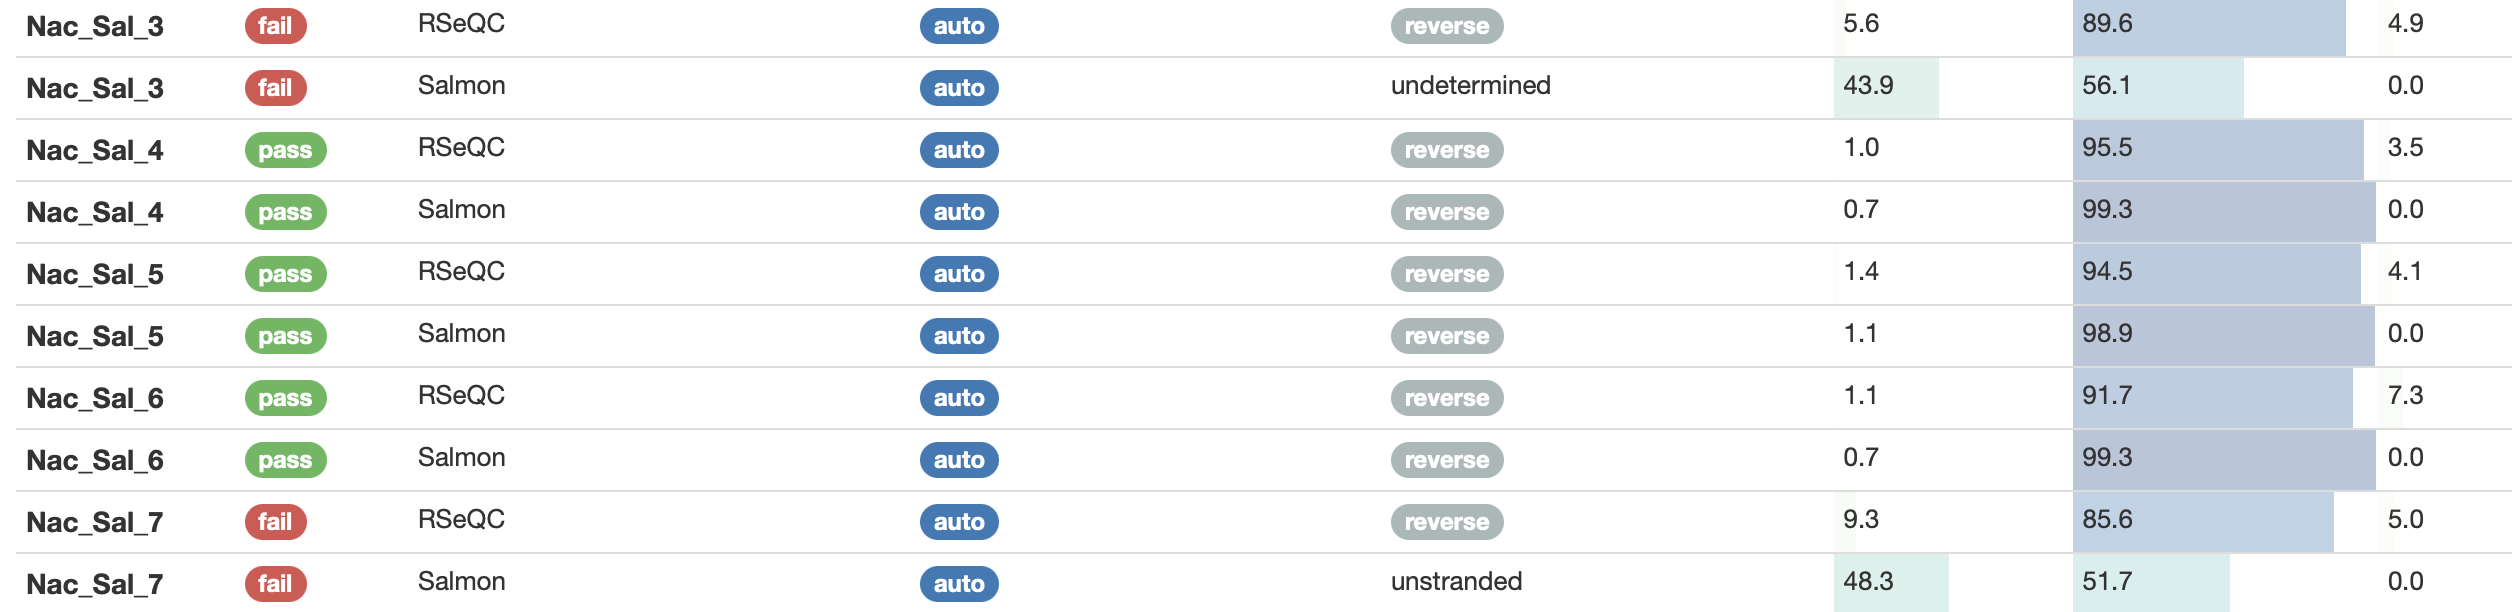

What would you now do to continue the experiment? What are the scientists trying to figure out? Which packages on R or python would you use?

We are trying to identify differentially expressed genes therefore it makes sense to try the nf-core/differentialabundance pipeline